In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
img_filename = '/content/input_image.jpg'
save_filename = '/content/output_image.jpg'


In [ ]:
img = Image.open(img_filename)

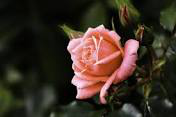

In [ ]:
img

In [ ]:
# convert to grayscale
imgray = img.convert(mode='L')

#convert to NumPy array
img_array = np.asarray(imgray)

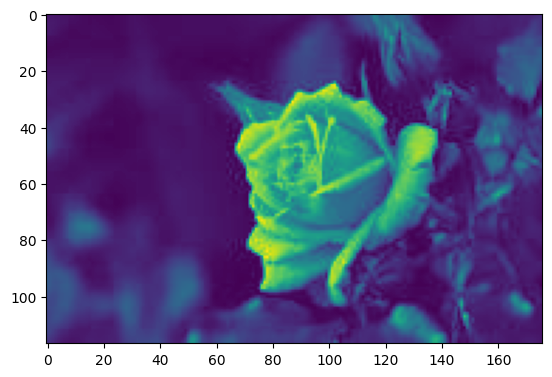

In [ ]:
plt.imshow(imgray)

STEP 1: Normalized cumulative histogram

In [ ]:
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

In [ ]:
histogram_array

array([ 14, 127, 148, 244, 319, 384, 500, 550, 620, 650, 499, 580, 610,
       548, 528, 522, 521, 478, 448, 440, 408, 337, 303, 255, 259, 226,
       237, 203, 204, 176, 204, 180, 153, 163, 161, 145, 161, 135, 124,
       134, 136, 156, 131, 142, 112, 117, 135, 152, 114, 130, 120, 104,
       115, 115, 100,  86,  86,  74,  77,  70,  77,  82,  58,  73,  78,
        73,  66,  70,  62,  71,  73,  62,  41,  57,  46,  49,  62,  48,
        59,  56,  42,  54,  56,  46,  49,  43,  44,  46,  49,  39,  52,
        36,  43,  37,  31,  24,  25,  25,  35,  29,  32,  36,  31,  34,
        18,  33,  32,  26,  23,  29,  19,  30,  23,  32,  27,  25,  31,
        34,  34,  28,  29,  30,  23,  31,  38,  30,  31,  36,  31,  33,
        32,  35,  30,  33,  30,  33,  35,  49,  41,  38,  27,  26,  30,
        27,  21,  27,  34,  34,  36,  23,  33,  25,  27,  28,  21,  36,
        29,  23,  22,  27,  22,  25,  28,  24,  32,  25,  27,  16,  27,
        32,  27,  25,  30,  29,  34,  20,  34,  32,  28,  24,  2

In [ ]:
#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

In [ ]:
histogram_array


array([6.79875680e-04, 6.16744367e-03, 7.18725719e-03, 1.18492618e-02,
       1.54914530e-02, 1.86480186e-02, 2.42812743e-02, 2.67094017e-02,
       3.01087801e-02, 3.15656566e-02, 2.42327117e-02, 2.81662782e-02,
       2.96231546e-02, 2.66122766e-02, 2.56410256e-02, 2.53496503e-02,
       2.53010878e-02, 2.32128982e-02, 2.17560218e-02, 2.13675214e-02,
       1.98135198e-02, 1.63655789e-02, 1.47144522e-02, 1.23834499e-02,
       1.25777001e-02, 1.09751360e-02, 1.15093240e-02, 9.85819736e-03,
       9.90675991e-03, 8.54700855e-03, 9.90675991e-03, 8.74125874e-03,
       7.43006993e-03, 7.91569542e-03, 7.81857032e-03, 7.04156954e-03,
       7.81857032e-03, 6.55594406e-03, 6.02175602e-03, 6.50738151e-03,
       6.60450660e-03, 7.57575758e-03, 6.36169386e-03, 6.89588190e-03,
       5.43900544e-03, 5.68181818e-03, 6.55594406e-03, 7.38150738e-03,
       5.53613054e-03, 6.31313131e-03, 5.82750583e-03, 5.05050505e-03,
       5.58469308e-03, 5.58469308e-03, 4.85625486e-03, 4.17637918e-03,
      

In [ ]:
#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)


In [ ]:
chistogram_array

array([6.79875680e-04, 6.84731935e-03, 1.40345765e-02, 2.58838384e-02,
       4.13752914e-02, 6.00233100e-02, 8.43045843e-02, 1.11013986e-01,
       1.41122766e-01, 1.72688423e-01, 1.96921134e-01, 2.25087413e-01,
       2.54710567e-01, 2.81322844e-01, 3.06963869e-01, 3.32313520e-01,
       3.57614608e-01, 3.80827506e-01, 4.02583528e-01, 4.23951049e-01,
       4.43764569e-01, 4.60130148e-01, 4.74844600e-01, 4.87228050e-01,
       4.99805750e-01, 5.10780886e-01, 5.22290210e-01, 5.32148407e-01,
       5.42055167e-01, 5.50602176e-01, 5.60508936e-01, 5.69250194e-01,
       5.76680264e-01, 5.84595960e-01, 5.92414530e-01, 5.99456099e-01,
       6.07274670e-01, 6.13830614e-01, 6.19852370e-01, 6.26359751e-01,
       6.32964258e-01, 6.40540016e-01, 6.46901709e-01, 6.53797591e-01,
       6.59236597e-01, 6.64918415e-01, 6.71474359e-01, 6.78855866e-01,
       6.84391997e-01, 6.90705128e-01, 6.96532634e-01, 7.01583139e-01,
       7.07167832e-01, 7.12752525e-01, 7.17608780e-01, 7.21785159e-01,
      

STEP 2: Pixel mapping lookup table

In [ ]:
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

In [ ]:
transform_map

array([  0,   1,   3,   6,  10,  15,  21,  28,  35,  44,  50,  57,  64,
        71,  78,  84,  91,  97, 102, 108, 113, 117, 121, 124, 127, 130,
       133, 135, 138, 140, 142, 145, 147, 149, 151, 152, 154, 156, 158,
       159, 161, 163, 164, 166, 168, 169, 171, 173, 174, 176, 177, 178,
       180, 181, 182, 184, 185, 186, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 195, 196, 197, 198, 198, 199, 200, 200, 201, 202,
       202, 203, 204, 204, 205, 205, 206, 207, 207, 208, 208, 209, 209,
       210, 210, 211, 211, 212, 212, 212, 213, 213, 213, 214, 214, 215,
       215, 215, 216, 216, 216, 217, 217, 217, 217, 218, 218, 219, 219,
       219, 220, 220, 220, 221, 221, 222, 222, 222, 223, 223, 224, 224,
       224, 225, 225, 226, 226, 226, 227, 227, 228, 228, 229, 229, 229,
       230, 230, 230, 231, 231, 232, 232, 232, 233, 233, 233, 234, 234,
       234, 235, 235, 235, 236, 236, 236, 236, 237, 237, 238, 238, 238,
       238, 239, 239, 239, 240, 240, 241, 241, 241, 242, 242, 24

STEP 3: Transformation

In [ ]:
# flatten image array into 1D list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)


In [ ]:
eq_img_array

array([[ 91,  84,  84, ..., 133, 142, 149],
       [ 97,  91,  91, ..., 145, 149, 152],
       [102,  97,  97, ..., 158, 158, 154],
       ...,
       [169, 164, 158, ...,  97,  91,  84],
       [161, 158, 151, ..., 108,  97,  91],
       [156, 152, 145, ..., 113, 102,  91]], dtype=uint8)

In [ ]:
eq_img = Image.fromarray(eq_img_array, mode='L')
eq_img.save(save_filename)


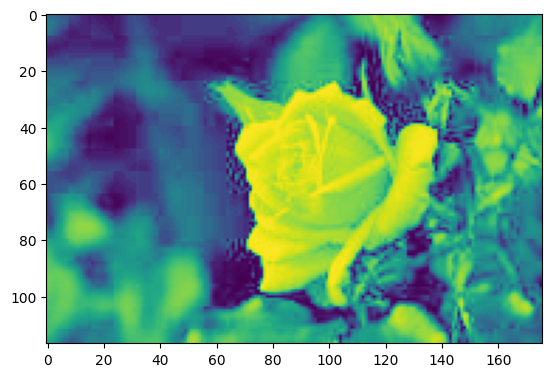

In [ ]:
plt.imshow(eq_img)

In [ ]:
import cv2
# Read the image
image = cv2.imread('/content/input_image.jpg')

In [ ]:
# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Apply Adaptive Histogram Equalization (AHE)
ahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
ahe_image = ahe.apply(gray_image)

In [ ]:
# Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(gray_image)

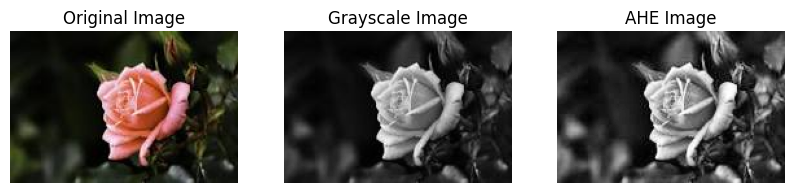

In [ ]:
# Display original, AHE, and CLAHE images
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ahe_image, cmap='gray')
plt.title('AHE Image')
plt.axis('off')

plt.show()

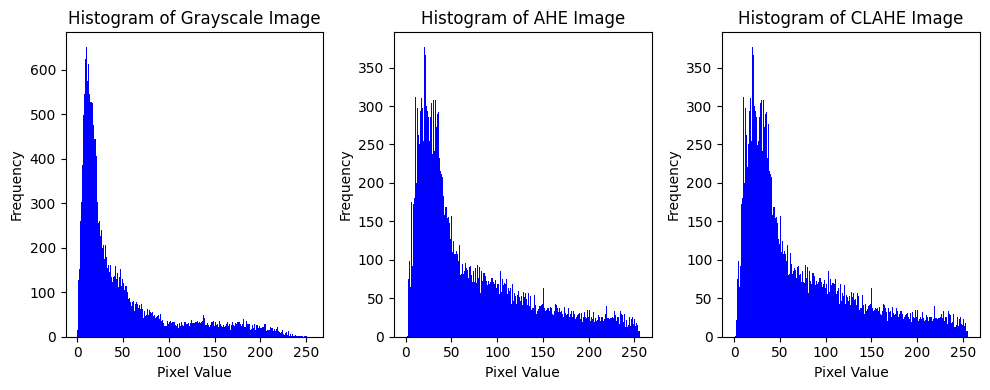

In [ ]:
# Display histograms of grayscale, AHE, and CLAHE images
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.hist(gray_image.flatten(), bins=256, range=[0, 256], color='b')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(ahe_image.flatten(), bins=256, range=[0, 256], color='b')
plt.title('Histogram of AHE Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(clahe_image.flatten(), bins=256, range=[0, 256], color='b')
plt.title('Histogram of CLAHE Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
